# Week 11 Problem Set


In [6]:
%load_ext nb_mypy
%nb_mypy On

The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


In [7]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from IPython.display import display


## Cohort Session

**CS0.** Do the following tasks before you start with the first cohort session.

**Task 1.** Paste the following functions from your previous work:
- `get_features_targets()`
- `normalize_z()`
- `prepare_feature()`
- `prepare_target()`
- `split_data()`


In [9]:
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    # check for optional values 
    if columns_means is None:
        # compute
        columns_means = array.mean(axis=0) 
    if columns_stds is None:
        # compute
        columns_stds = array.std(axis=0) 
    normalized_columns: np.ndarray = (array - columns_means) / columns_stds
    return normalized_columns, columns_means, columns_stds


def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature: pd.DataFrame = df[feature_names]
    df_target: pd.DataFrame = df[target_names] 
    pass
    return df_feature, df_target

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
   # this function returns the X matrix 
   # given a feature vector / matrix, augment it with column of 1s as the first column
   # feature: [[x1], [x2], [x3]] 
   # X:[[1, x1], [1, x2], [1, x3]] 

   number_of_rows = np_feature.shape[0]
   
   # create a vector of ones, with rows as many as the np_feature rows 
   column_of_ones = np.ones((number_of_rows,1))
   
   X = np.concatenate((column_of_ones,np_feature), axis=1 )

   return X

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:

    # get all the indexes (row index) of the complete dataset  
    indexes = df_feature.index  # e.g: 0, 1, 2, 3, ... 999

    # check whether random state is given 
    if random_state != None:
        np.random.seed(random_state) # if random_state is None, then we don't execute this line 

    # if random_state in None, then we will have a different set of train/test set each time we call this function
    # otherwise, it will be the same selection each time 

    # e.g: if test_size is 0.3, and len(indexes) is 1000, then test_set_size will be 300
    test_set_size = int(test_size * len(indexes)) # this will be the amount of dataset in the test set 

    # test_index will be a random 30% selection of indexes 
    # replace = False tells numpy that we won't have repeated indexes 
    test_index = np.random.choice(indexes, test_set_size, replace=False)

    train_index = indexes.drop(test_index) 
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index,:]
    df_target_train = df_target.loc[train_index]
    df_target_test = df_target.loc[test_index,:]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
    


**Task 2.** Load the breast cancer data from `breast_cancer_data.csv` into a Data Frame. 

In [11]:
# read breast_cancer_data.csv
# df: pd.DataFrame = None

### BEGIN SOLUTION
df = pd.read_csv("breast_cancer_data.csv")
### END SOLUTION

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Task 3.** Do the following tasks.

- Read the following columns
    - feature: `radius_mean`
    - target: `diagnosis`
- Normalize the feature column using z normalization.

In [13]:
# extract the feature and the target
# df_feature, df_target = None, None

# normalize the feature
# array_feature,_,_ = None, None, None

### BEGIN SOLUTION
df_feature, df_target = get_features_targets(df, ["radius_mean"], ["diagnosis"])
### END SOLUTION

df_target 
df_feature

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


**Task 4.** Write a function `replace_target()` to replace the `diagnosis` column with the following mapping:
    - `M`: `1`, this means that malignant cell are indicated as `1` in our new column.
    - `B`: `0`, this means that benign cell are indicated as `0` in our new column.
    
The function should takes in the following:

- `df_target`: the target data frame
- `target_name`: which is the column name of the target data frame
- `map`: which is a dictionary containing the map
    
It should returns a new data frame with the same column name but with its values changed according to the mapping.

In [14]:
# target_name: the column name to replace
# map_vals: how we want to map the element of each column? e.g: M --> 1, B --> 0
# we tend to label the "more important class" as 1, in this case, M (malignant) feels more important 
def replace_target(df_target: pd.DataFrame, 
                   target_name: str, map_vals: dict[Any, Any]) -> pd.DataFrame:
    # df_target initially contains rows of "M" or "B" 
    # we want to replace all M as 1, and all B as 0 

    # make a copy of the df_target 
    df_out = df_target.copy() # this is a deep copy, changing df_out will not change df_target 

    # replace the value of all rows with target_name 
    # we are applying the function lambda x: map_vals[x] to all rows of "target_name" 
    # the return value of the lambda function will be stored into each element (row) of df_target[target_name]
    # the .apply function returns a new dataframe 
    df_out.loc[:, target_name] = df_target[target_name].apply(lambda x: map_vals[x])
    return df_out

# lambda x: map_vals[x] is equivalent to: 
def replace_value(x, map_vals):
    return map_vals[x]

In [15]:
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})
df_target

/var/folders/b3/pvp9jvbs7b7dcgq7357wcymr0000gp/T/ipykernel_15980/2757786756.py:16: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_out.loc[:, target_name] = df_target[target_name].apply(lambda x: map_vals[x])


,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


**Task 5.** Do the following tasks.
- Change feature to Numpy array and append constant 1 column.
- Change target to Numpy array

In [9]:
# change feature data frame to numpy array and append column 1
# feature: np.ndarray = None

# change target data frame to numpy array
# target: np.ndarray = None

### BEGIN SOLUTION
# get the X matrix from the features
feature: np.array = prepare_feature(df_feature) 
target = df_target.to_numpy()
### END SOLUTION

**CS1.** *Logistic function:* Write a function to calculate the hypothesis using a logistic function. Recall that the hypothesis for a logistic regression model is written as:

$$\mathbf{p}(x) = \frac{1}{1 + e^{-\mathbf{X}\mathbf{b}}}$$

The shape of the input is as follows:
- $\mathbf{b}$: is a column vector for the parameters
- $\mathbf{X}$: is a matrix where the number of rows are the number of data points and the the number of columns must the same as the number of parameters in $\mathbf{b}$.

Note that you need to ensure that the output is a **column vector**. 

You can use the following functions:
- `np.matmul(array1, array2)`: which is to perform matrix multiplication on the two numpy arrays.
- `np.exp()`: which is to calculate the function $e^x$

In [16]:
# this analogous to last week's calc_linreg
# same signature: args needed are X and beta, return value is a float 
def calc_logreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    X: np.ndarray = X.astype(float)
    beta: np.ndarray = beta.astype(float)
    out = 1.0/(1.0 + np.exp(np.matmul(X, -beta))) # 1/(1+e^(-Xb))
    return out

In [17]:
beta: np.ndarray = np.array([0])
x: np.ndarray = np.array([0])
ans: np.ndarray = calc_logreg(x, beta)
assert ans == 0.5

beta: np.ndarray  = np.array([2])
x: np.ndarray  = np.array([40])
ans: np.ndarray  = calc_logreg(x, beta)
assert np.isclose(ans, 1.0)

beta: np.ndarray  = np.array([2])
x: np.ndarray  = np.array([-40])
ans: np.ndarray  = calc_logreg(x, beta)
assert np.isclose(ans, 0.0)

beta: np.ndarray  = np.array([[1, 2, 3]])
x: np.ndarray  = np.array([[3, 2, 1]])
ans: np.ndarray  = calc_logreg(x, beta.T)
assert np.isclose(ans.all(), 1.0)

beta: np.ndarray  = np.array([[1, 2, 3]])
x: np.ndarray  = np.array([[3, 2, 1], [3, 2, 1]])
ans: np.ndarray  = calc_logreg(x, beta.T)
assert ans.shape == (2, 1)
assert np.isclose(ans.all(), 1.0)

**CS2.** *Cost Function:* Write a function to calculate the cost function for logistic regression. Recall that the cost function for logistic regression is given by:

$$J(\beta) = -\frac{1}{m}\left[\Sigma_{i=1}^m y^i \log(p(x^i)) + (1 - y^i) \log(1 - p(x^i))\right]$$

You can use the following function in your code:
- `np.where(condition, then_expression, else_expression)`

In [18]:
# y: vector of actual target, consisted of 1s or 0s, a vector of m elements
# X: feature matrix (m by d dimension)
# beta: parameter vector (d elements)
def compute_cost_logreg(beta: np.ndarray, 
                        X: np.ndarray, 
                        y: np.ndarray) -> Number:
    np.seterr(divide = 'ignore') 
    ### BEGIN SOLUTION
    m = X.shape[0]

    # fancy numpy way 
    J = -(1/m) * np.sum(np.where(
        y==1, 
        np.log(calc_logreg(X, beta)), # error when actual value y is 1
        np.log(1-calc_logreg(X, beta)) # error when actual value y is 0
    ))

    # old-fashioned loop 
    # J = 0
    # for y_i in y.flatten(): 
    #     if (y_i == 0):
    #         J = J + np.log(1-calc_logreg(X, beta))
    #     else:
    #         J = J + np.log(calc_logreg(X,beta))
            
    ### END SOLUTION
    np.seterr(divide = 'warn')
    return J

In [19]:
y: np.ndarray = np.array([[1]])
X: np.ndarray  = np.array([[10, 40]])
beta: np.ndarray  = np.array([[1, 1]]).T
ans: Number = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

y: np.ndarray  = np.array([[0]])
X: np.ndarray  = np.array([[10, 40]])
beta: np.ndarray  = np.array([[-1, -1]]).T
ans: Number = compute_cost_logreg(beta, X, y)
print(ans)
assert np.isclose(ans, 0)

-0.0
-0.0


**CS3.** *Gradient Descent:* Recall that the update functions can be written as a matrix multiplication.

$$\mathbf{b} = \mathbf{b} - \alpha\frac{1}{m}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) $$

Write a function called `gradient_descent_logreg()` that takes in four parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

The solution is similar to Linear Regression gradient descent function with two differences:
- you need to use `log_regression()` to calculate the hypothesis
- you need to use `compute_cost_logreg()` to calculate the cost

In [16]:
def gradient_descent_logreg(X: np.ndarray, 
                            y: np.ndarray, 
                            beta: np.ndarray, 
                            alpha: float,
                            num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    ### BEGIN SOLUTION
    J_storage = np.zeros((num_iters,1)) # prepare an array to store the error value at each iteration so we can plot later 
    m = X.shape[0] # number of elements in the trainset 
    for n in range(num_iters):
        derivative_value = (1/m) * np.matmul(X.T, (calc_logreg(X,beta)-y))
        beta = beta - alpha * derivative_value 
        J_storage[n] = compute_cost_logreg(beta, X, y)
    ### END_SOLUTION 
    return beta.astype(float), J_storage

In [17]:
iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((2,1))
beta, J_storage = gradient_descent_logreg(feature, target, beta, alpha, iterations)

print(beta)
assert beta.shape == (2, 1)
assert np.isclose(beta[0][0], -0.56631, rtol=1e-3)
assert np.isclose(beta[1][0], 1.93742, rtol=1e-3)

[[-0.56630978]
 [ 1.93742212]]


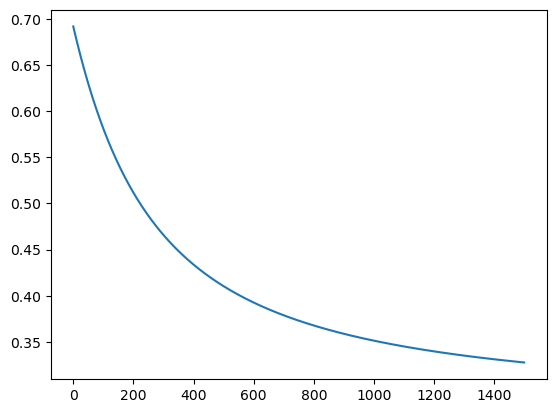

In [19]:
plt.plot(J_storage)

**CS4.** *Predict:* Write two functions `predict_logreg()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict_logreg()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the hypothesis or its probability using `calc_logreg()` and categorize it to either 0 or 1 based on its probability. If the probability is greater or equal to 0.5, it should be classified as class 1. Otherwise, it is classified as 0.

You can use the following function in your code:
- `np.where()`

In [20]:
def predict_norm(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    ### BEGIN SOLUTION
    ### END SOLUTION
    pass

In [21]:
def predict_logreg(array_feature: np.ndarray, 
                   beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    ### BEGIN SOLUTION
    ### END SOLUTION
    pass

In [22]:
df_feature, df_target = get_features_targets(df, ["radius_mean"], ["diagnosis"])
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})
pred: np.ndarray = predict_logreg(df_feature.to_numpy(), beta)
print(pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 0.28998)
assert np.isclose(pred.std(), 0.45375)

0.28998242530755713 0.4537539182423709


In [23]:
means: np.ndarray = np.array([0]).reshape(1,1)
stds: np.ndarray = np.array([1]).reshape(1,1)
beta: np.ndarray =np.array([[-0.56630289], [ 1.93763591]])
input_1row: np.ndarray = np.array([[2.109139]])
pred_1row: np.ndarray = predict_logreg(input_1row, beta, means, stds)
assert pred_1row[0][0] == 1

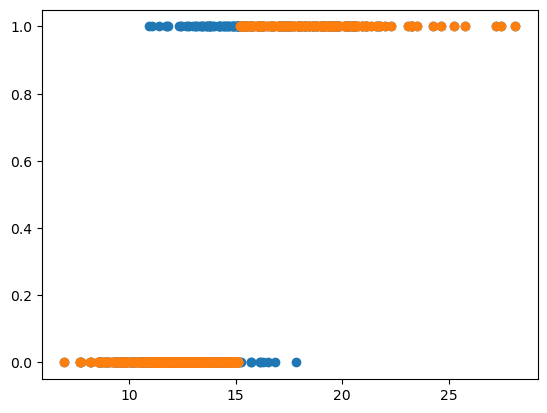

In [25]:
plt.scatter(df_feature, df_target)
plt.scatter(df_feature, pred)

**CS5.** *Multiple features and splitting of data set:* 

Do the following task in the code below:
- Read the following column names as the features: `"radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"`
- Read the column `diagnosis` as the target. Change the value from `M` and `B` to `1` and `0` respectively.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.
- Call `predict()` function on the test data set to get the predicted values.

In [26]:
columns: list[str] = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]

# extract the features and the target columns
# df_features, df_target = None, None

# replace the target values using from string to integer 0 and 1
# df_target: pd.DataFrame = None

# split the data with random_state = 100 and 30% test size
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# normalize the features
# array_features_train_z, means, stds = None, None, None

# change the feature columns to numpy array and append column of 1s
# features: np.ndarray = None

# change the target column to numpy array
# target: np.ndarray = None

# iterations: int = 1500
# alpha: float = 0.01

# provide initial guess for beta
# beta: np.ndarray = None

# call the gradient descent method
# beta, J_storage = None, None

### BEGIN SOLUTION

### END SOLUTION
print(beta)



[[-0.6138507 ]
 [ 0.82491639]
 [ 0.72743625]
 [ 0.82325868]
 [ 0.81618797]
 [ 0.5057594 ]
 [ 0.44115946]
 [ 0.78701749]]


In [27]:
assert beta.shape == (8, 1)
ans: np.ndarray = np.array([[-0.6138507], 
                [ 0.8249164],
                [ 0.7274362],
                [ 0.8232587],
                [ 0.8161879],
                [ 0.5057594],
                [ 0.4411595],
                [ 0.7870175]])
assert np.isclose(beta, ans).all()

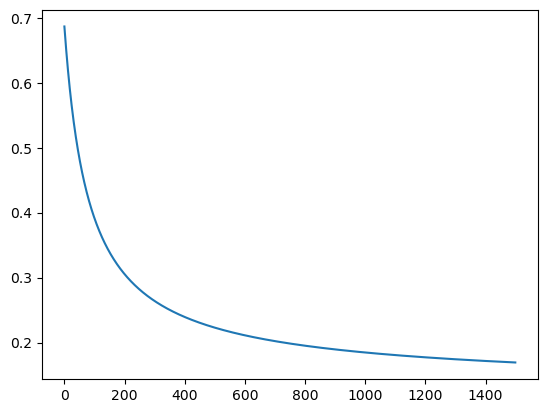

In [29]:
plt.plot(J_storage)

**CS6.** Create a function `build_model_logreg()` that perform the following steps:
- change all data to numpy array.
- normalize the training feature data set using `normalize_z()` function.
- create X matrix.
- use `reshape(-1, 1)` on the target array to make sure it is a column vector. 
- run gradient descent by calling `gradient_descent_logreg()` function.

This function should output `model` and `J_storage` where `model` is a dictionary containing `beta`, `means` and `stds`. 

In [30]:
def build_model_logreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:
    if beta is None:
        beta = np.zeros((df_feature_train.shape[1] + 1, 1)) 
    assert beta.shape == (df_feature_train.shape[1] + 1, 1)
    model: dict[str, Any] = {}
    ### BEGIN SOLUTION
    array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())
    X: np.ndarray = prepare_feature(array_feature_train_z)
    target: np.ndarray = df_target_train.to_numpy().reshape(-1,1)
    beta, J_storage = gradient_descent_logreg(X, target, beta, alpha, iterations)
    model = {"beta": beta, "means": means, "stds": stds}
    ### END SOLUTION
    return model, J_storage

In [31]:
columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]
df_features, df_target = get_features_targets(df, columns, ["diagnosis"])
df_target: pd.DataFrame = replace_target(df_target, "diagnosis", {'M': 1, 'B': 0})

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
model, J_storage = build_model_logreg(df_features_train, df_target_train)

assert isinstance(model, dict)
assert "beta" in model
assert "means" in model
assert "stds" in model
assert model["beta"].shape == (8, 1)
ans: np.ndarray = np.array([[-0.6138507], 
                [ 0.8249164],
                [ 0.7274362],
                [ 0.8232587],
                [ 0.8161879],
                [ 0.5057594],
                [ 0.4411595],
                [ 0.7870175]])
assert np.isclose(model["beta"], ans).all()
assert np.isclose(model['means'][0, 0], 1.40347594e+01)
assert np.isclose(model['stds'][-1, -1], 7.54400405e-02)

In [33]:

# call predict() on one record to get the predicted values
# use the variable 'means' and 'stds' to normalize
input_1row: np.ndarray = np.array([[12.22, 20.04, 79.47, 453.1, 0.10960, 0.11520, 0.08175]])

# replace the None
# pred_1row: np.ndarray = None

### BEGIN SOLUTION
### END SOLUTION

In [34]:
assert pred_1row[0][0] == 0

In [35]:
# call predict() on df_features test dataset to get the predicted values
# pred: np.ndarray = None

### BEGIN SOLUTION
### END SOLUTION

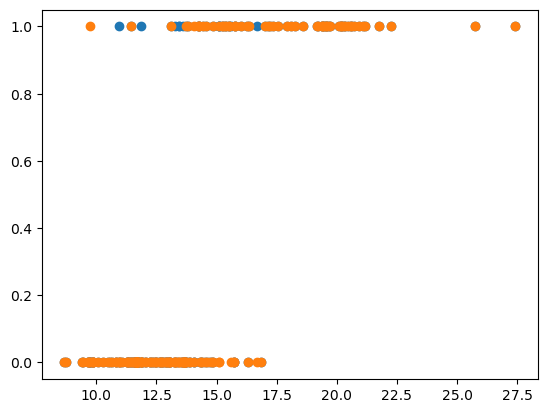

In [36]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

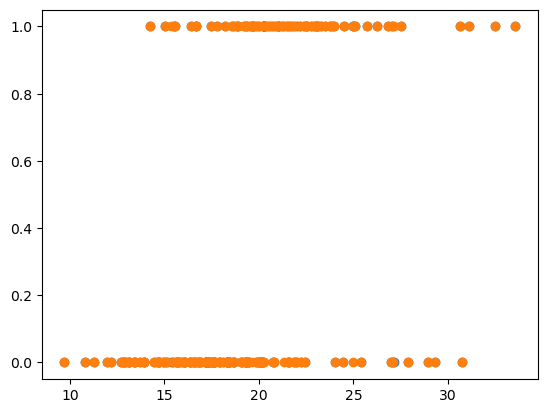

In [37]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

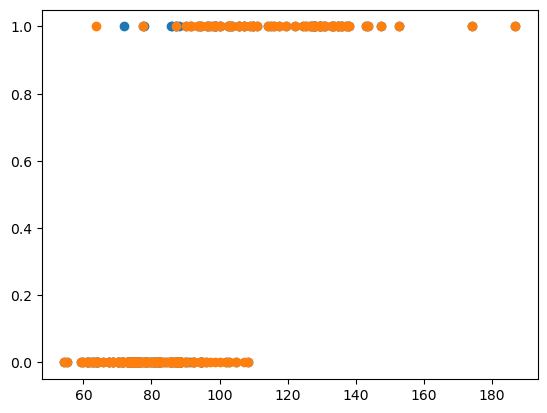

In [38]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)

**CS7.** *Confusion Matrix:* Write a function `confusion_matrix()` that takes in:
- `ytrue`: which is the true target values
- `ypred`: which is the predicted target values
- `labels`: which is a list of the category. In the above case it will be `[1, 0]`. Put the positive case as the first element of the list. 

The function should return a dictionary containing the matrix with the following format.

|                 | predicted positive (1) | predicted negative (0) |
|-----------------|--------------------|--------------------|
| actual positive (1) | correct positive  (1, 1) | false negative (1, 0)    |
| actual negative (0) | false positive (0, 1)   | correct negative (0, 0)   |

The keys to the dictionary are the indices: `(0, 0), (0, 1), (1, 0), (1, 1)`.

You can use the following function in your code:
- `itertools.product()`: this is to create a combination of all the labels. 

In [39]:
import itertools
def confusion_matrix(ytrue: np.ndarray, 
                     ypred: np.ndarray, 
                     labels: list[int]) -> dict[tuple[int, int], int]:
    output: dict[tuple[int, int], int] = {}
    ### BEGIN SOLUTION

    ### END SOLUTION
    return output


In [40]:
result: dict[tuple[int, int], int] = confusion_matrix(df_target_test.values, pred, [1,0])
print(result)
assert result == {(0, 0): 99, (0, 1): 2, (1, 0): 10, (1, 1): 59}

{(1, 1): 59, (1, 0): 10, (0, 1): 2, (0, 0): 99}


**CS8.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `specificity`: total true negatives / total negative cases
- `precision`: total  of correct positive cases / total predicted positive cases

In [42]:
def calc_accuracy(cm: dict[tuple[int, int], int]) -> dict[str, float]:
    ### BEGIN SOLUTION

    ### END SOLUTION
    result: dict[str, float] = {'accuracy': accuracy, 'sensitivity': sensitivity,
              'specificity': specificity, 'precision': precision}
    return result


In [43]:
ans: dict[str, float] = calc_accuracy(result)
# print(ans)
expected = {'accuracy': 0.9294, 'sensitivity': 0.8551, 'specificity': 0.9802, 'precision': 0.9672}
assert np.isclose(ans['accuracy'], expected['accuracy'], rtol=1e-3)
assert np.isclose(ans['sensitivity'], expected['sensitivity'], rtol=1e-3)
assert np.isclose(ans['specificity'], expected['specificity'], rtol=1e-3)
assert np.isclose(ans['precision'], expected['precision'], rtol=1e-3)
 

**CS9.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm_sk

In [46]:
columns: list[str] = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean"]
# get the features and the columns
# df_features, df_target = None

# replace target values with 0 and 1
# df_target: pd.DataFrame = None

### BEGIN SOLUTION

### END SOLUTION

In [47]:
# split data set using random_state = 100 and 30% test size
# df_features_train, df_features_test, df_target_train, df_target_test = None, None, None, None

# change feature to numpy array and append column of 1s
# feature: np.ndarray = None

# change target to numpy array
# target: np.ndarray = None

# this is to ensure it is either 0 or 1

### BEGIN SOLUTION

### END SOLUTION
target: np.ndarray = target.astype(int) 
print(target.shape)

(398, 1)


In [50]:
# create LogisticRegression object instance, use newton-cg solver
# model: LogisticRegression = None

# build model
# pass

# get predicted value
# pred: np.ndarray = None

### BEGIN SOLUTION

### END SOLUTION 

In [53]:
# calculate confusion matrix
# cm: dict[tuple[int, int], int] = None

### BEGIN SOLUTION

### END SOLUTION


In [54]:
expected: np.ndarray = np.array([[58,  11], [6, 96]])
assert np.array(cm == expected).all()

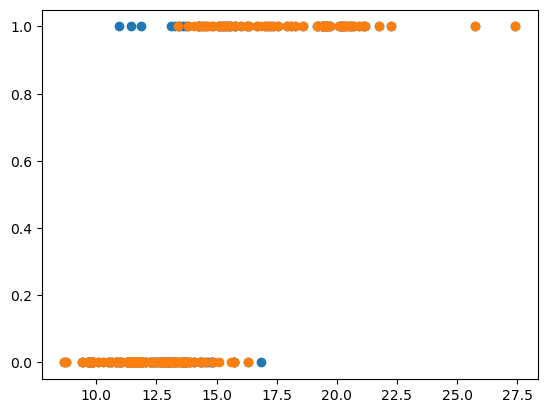

In [55]:
plt.scatter(df_features_test["radius_mean"], df_target_test)
plt.scatter(df_features_test["radius_mean"], pred)

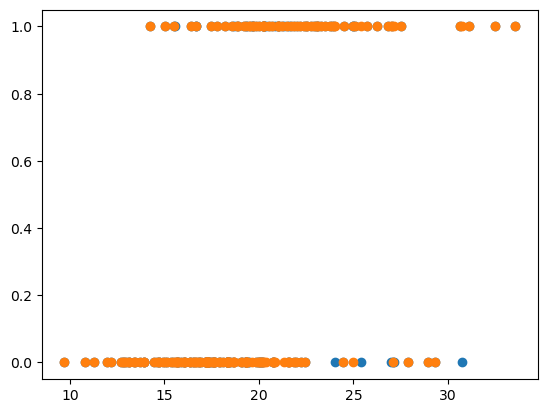

In [56]:
plt.scatter(df_features_test["texture_mean"], df_target_test)
plt.scatter(df_features_test["texture_mean"], pred)

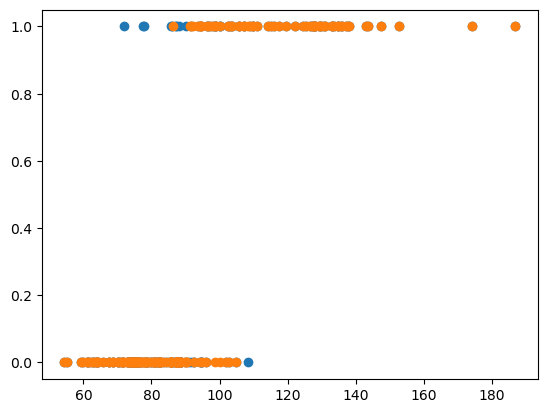

In [57]:
plt.scatter(df_features_test["perimeter_mean"], df_target_test)
plt.scatter(df_features_test["perimeter_mean"], pred)